# 1️⃣ UNIVARIATE ANALYSIS — CATEGORICAL VARIABLES

### Import libraries + load data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("pune_commercial_listings_cleaned.csv")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

df.head()

,locality,location_full,property_type,sqft,rent,deposit,price_per_sqft,furnishing
0,Kothrud,hapoy colony near van devi mandir karve nagar ...,Office,650,12000,24000,18.46,Furnished
1,Kothrud,"Gandhi Bhavan Rd, Gandhi Bhavan (Maharashtra G...",Shop,160,20000,60000,125.00,Unfurnished
2,Kothrud,"Chandani chowk , Shinde Farm Golden Group,",Shop,500,100000,300000,200.00,Furnished
3,Kothrud,"Paschimanagri,, City Pride- Kothrud",Office,230,100000,300000,434.78,Furnished
4,Kothrud,"Late. G A kulkarni road, Opposite Karishma Soc...",Office,100,10000,10000,100.00,Furnished


### property_type Frequency Distribution

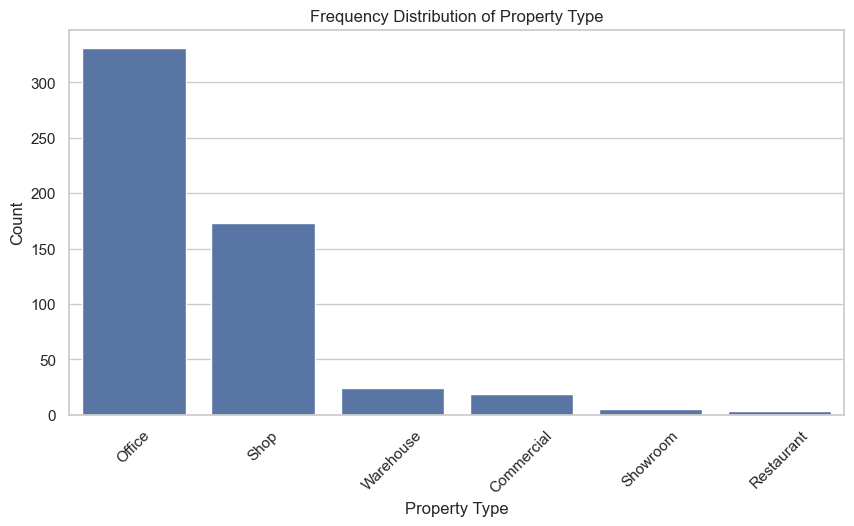

property_type
Office        59.639640
Shop          31.171171
Warehouse      4.324324
Commercial     3.423423
Showroom       0.900901
Restaurant     0.540541
Name: proportion, dtype: float64

In [2]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="property_type", order=df['property_type'].value_counts().index)
plt.title("Frequency Distribution of Property Type")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

df['property_type'].value_counts(normalize=True) * 100


### 📝 Insight:

+ Offices dominate the commercial listings (~60%).

+ Shops form the second biggest category (~30%).

+ Warehouse, Commercial, Showroom, Restaurant are niche segments.

+ This suggests the dataset reflects an office-heavy commercial market.

----------------
----------------

### locality Frequency Distribution (Top 15)

C:\Users\rohit\AppData\Local\Temp\ipykernel_11864\2295448388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_localities.values, y=top_localities.index, palette="viridis")


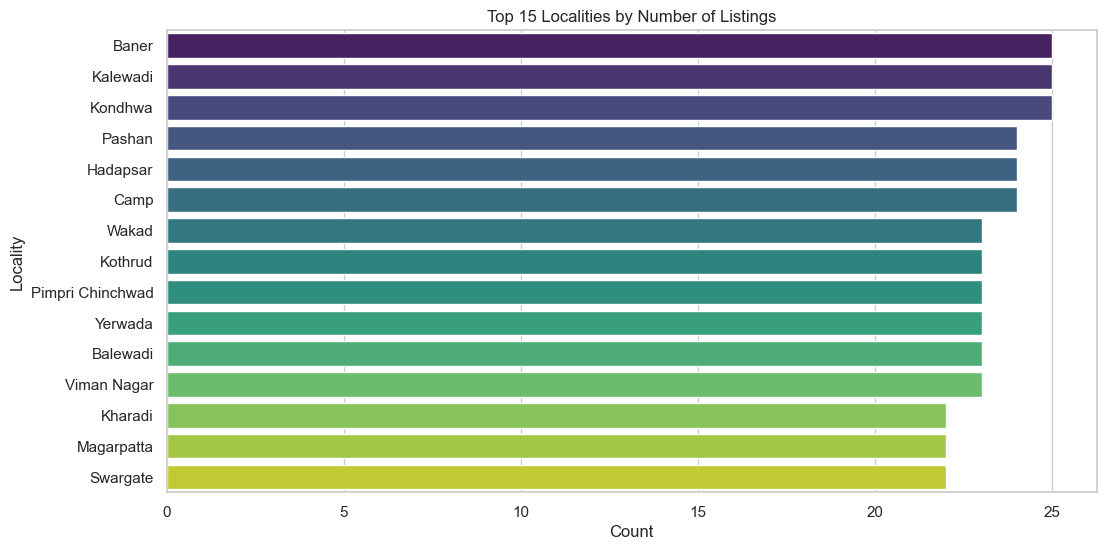

locality
Baner               25
Kalewadi            25
Kondhwa             25
Pashan              24
Hadapsar            24
Camp                24
Wakad               23
Kothrud             23
Pimpri Chinchwad    23
Yerwada             23
Balewadi            23
Viman Nagar         23
Kharadi             22
Magarpatta          22
Swargate            22
Name: count, dtype: int64

In [3]:
top_localities = df['locality'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_localities.values, y=top_localities.index, palette="viridis")
plt.title("Top 15 Localities by Number of Listings")
plt.xlabel("Count")
plt.ylabel("Locality")
plt.show()

top_localities

### 📝 Insight Example:

+ Most commercial spaces are unfurnished or semi-furnished.

+ Furnished listings are significantly fewer → typical for office/retail leasing.

+ Furnishing has low variance; treat as optional feature.

----------------
----------------

### Pie Chart for Property Type

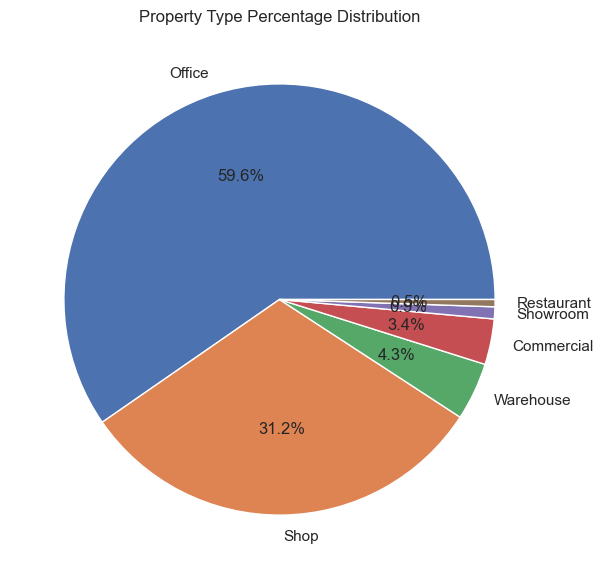

In [4]:
df['property_type'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(7,7), ylabel=""
)
plt.title("Property Type Percentage Distribution")
plt.show()

### 📝 Insight:

+ This gives a clean market share view of each category.

-------------
-------------

# BIVARIATE ANALYSIS (Categorical ↔ Categorical)

### Crosstab: property_type vs furnishing

In [5]:
pd.crosstab(df['property_type'], df['furnishing'])

furnishing,Furnished,Semi-Furnished,Unfurnished
property_type,,,
Commercial,8,0,11
Office,92,75,164
Restaurant,1,0,2
Shop,15,26,132
Showroom,1,2,2
Warehouse,1,4,19


### ✔ Interpretation:

+ This shows how furnishing type is distributed across each property type.

### 2️⃣ Crosstab with Row Percentages

In [6]:
pd.crosstab(df['property_type'], df['furnishing'], normalize='index') * 100

furnishing,Furnished,Semi-Furnished,Unfurnished
property_type,,,
Commercial,42.105263,0.000000,57.894737
Office,27.794562,22.658610,49.546828
Restaurant,33.333333,0.000000,66.666667
Shop,8.670520,15.028902,76.300578
Showroom,20.000000,40.000000,40.000000
Warehouse,4.166667,16.666667,79.166667


### ✔ Interpretation Example:

+ Offices may have more unfurnished or semi-furnished listings

+ Showrooms may have a higher chance of being furnished

+ Helps understand furnishing preferences by property category

### 3️⃣ Heatmap of Crosstab (BEST VISUAL)

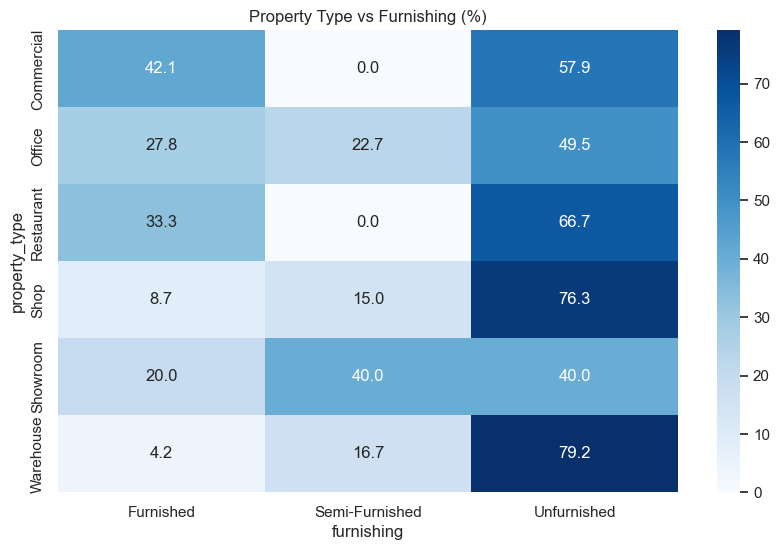

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(df['property_type'], df['furnishing'], normalize='index') * 100

plt.figure(figsize=(10,6))
sns.heatmap(ct, annot=True, cmap="Blues", fmt=".1f")
plt.title("Property Type vs Furnishing (%)")
plt.show()

### ✔ Interpretation:

+ This visually shows which property types are more likely to be:

    - Furnished

    - Unfurnished

    - Semi-Furnished

### 4️⃣ Crosstab: property_type vs locality (Top 10 Localities)

In [8]:
top10 = df['locality'].value_counts().head(10).index
df_top = df[df['locality'].isin(top10)]

pd.crosstab(df_top['locality'], df_top['property_type'])

property_type,Commercial,Office,Restaurant,Shop,Showroom,Warehouse
locality,,,,,,
Baner,1,22,1,1,0,0
Camp,1,14,0,7,0,2
Hadapsar,0,13,0,8,1,2
Kalewadi,2,9,0,13,0,1
Kondhwa,1,11,0,12,0,1
Kothrud,2,16,1,3,1,0
Pashan,0,16,1,6,1,0
Pimpri Chinchwad,0,14,0,9,0,0
Wakad,0,16,0,6,1,0


### ✔ Interpretation:

+ Shows concentration of property types within each major locality.

### 5️⃣ Heatmap for locality vs property_type

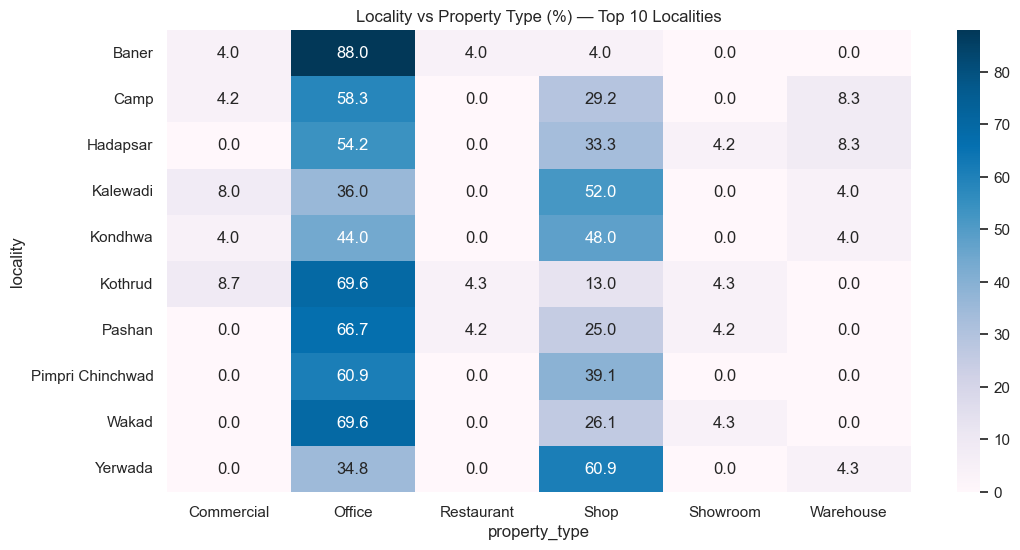

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(
    pd.crosstab(df_top['locality'], df_top['property_type'], normalize='index') * 100,
    annot=True, cmap="PuBu", fmt=".1f"
)
plt.title("Locality vs Property Type (%) — Top 10 Localities")
plt.show()

### ✔ Interpretation Example:

+ Baner may show higher share of offices

+ Koregaon Park may show more restaurant/showroom spaces

+ Cheaper localities may have more warehouses or smaller shops

### 6️⃣ Stacked Bar Plot

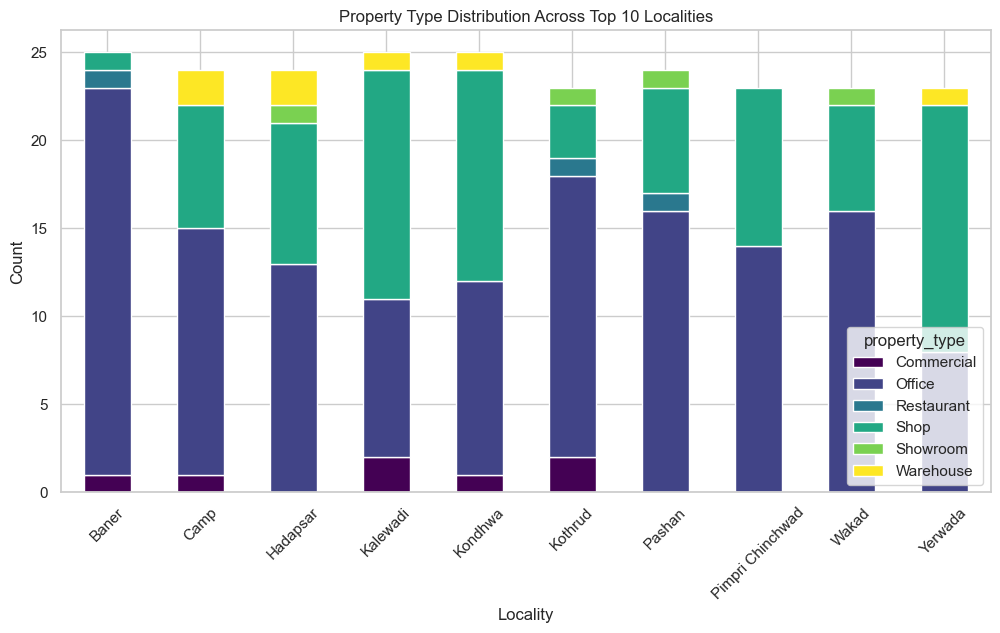

In [10]:
ct_plot = pd.crosstab(df_top['locality'], df_top['property_type'])

ct_plot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Property Type Distribution Across Top 10 Localities")
plt.xlabel("Locality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### ✔ Interpretation:

+ This shows how each locality's commercial landscape is composed.

# Multivariate analysis (Categorical)

### Multivariate Crosstab (property_type × locality × furnishing)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top10 = df['locality'].value_counts().head(10).index
df_top = df[df['locality'].isin(top10)]

ct = pd.crosstab(
    [df_top['locality'], df_top['property_type']],
    df_top['furnishing'],
    normalize='index'
) * 100

ct.head()

furnishing               Furnished  Semi-Furnished  Unfurnished
locality property_type                                         
Baner    Commercial     100.000000        0.000000     0.000000
         Office          31.818182        9.090909    59.090909
         Restaurant       0.000000        0.000000   100.000000
         Shop             0.000000      100.000000     0.000000
Camp     Commercial     100.000000        0.000000     0.000000

### ✔ Insight:

+ This table tells us how furnishing level varies for every property type within each locality.

--------------
--------------

### 2️⃣ Heatmap of Multivariate Crosstab

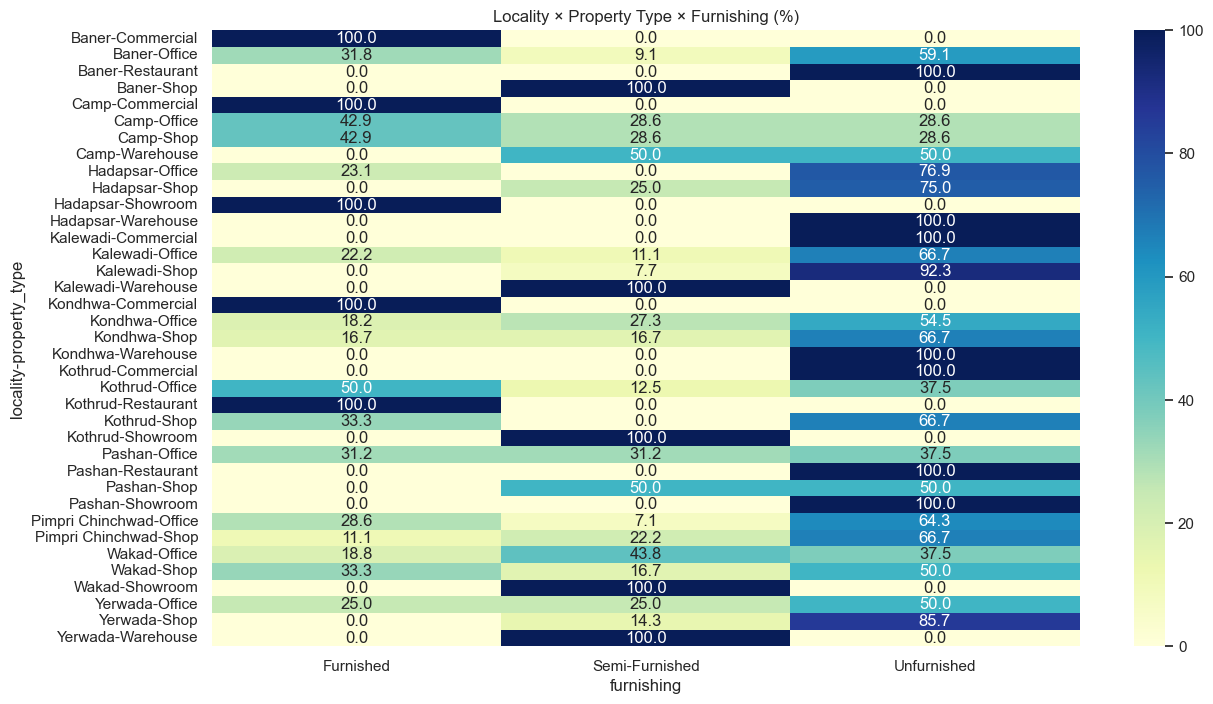

In [4]:
plt.figure(figsize=(14, 8))
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Locality × Property Type × Furnishing (%)")
plt.show()

### ✔ Insight:

+ This reveals:

+ Which localities prefer unfurnished vs semi-furnished units

+ Which property types tend to be furnished in premium areas

+ Whether certain property types cluster in specific furnishing patterns

# Numerical Analysis

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("pune_commercial_listings_cleaned.csv")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

### 1️⃣ Numerical Univariate Analysis — RENT

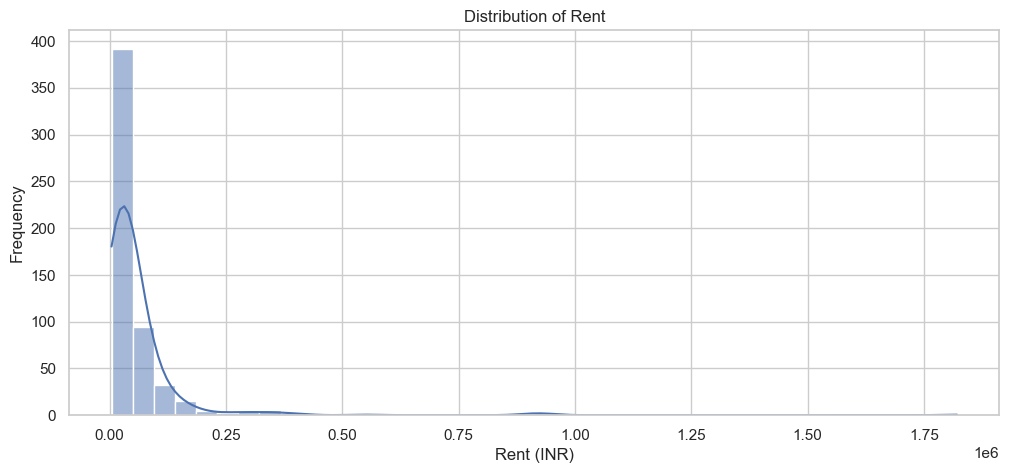

In [6]:
sns.histplot(df['rent'], kde=True, bins=40)
plt.title("Distribution of Rent")
plt.xlabel("Rent (INR)")
plt.ylabel("Frequency")
plt.show()

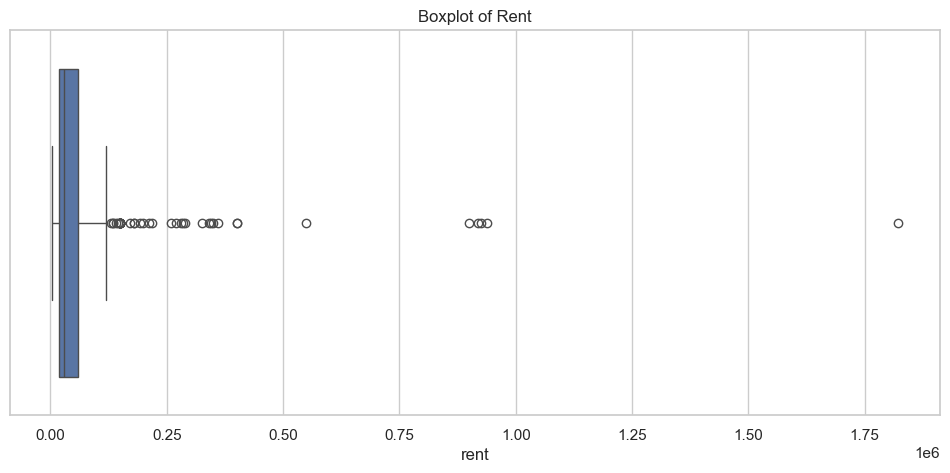

In [7]:
sns.boxplot(x=df['rent'])
plt.title("Boxplot of Rent")
plt.show()

### 📝 Insight Example:

+ Rent distribution is right-skewed, meaning most commercial properties fall in the affordable range, while a few premium listings push up the long tail.

+ Boxplot confirms the presence of valid high-value outliers (premium commercial units).

-----------------
-----------------

### 2️⃣ Numerical Univariate Analysis — SQFT

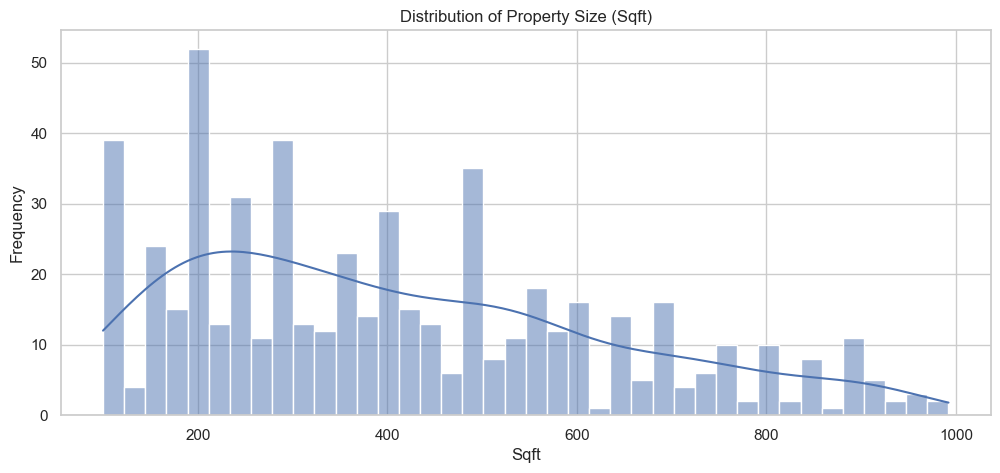

In [8]:
sns.histplot(df['sqft'], kde=True, bins=40)
plt.title("Distribution of Property Size (Sqft)")
plt.xlabel("Sqft")
plt.ylabel("Frequency")
plt.show()

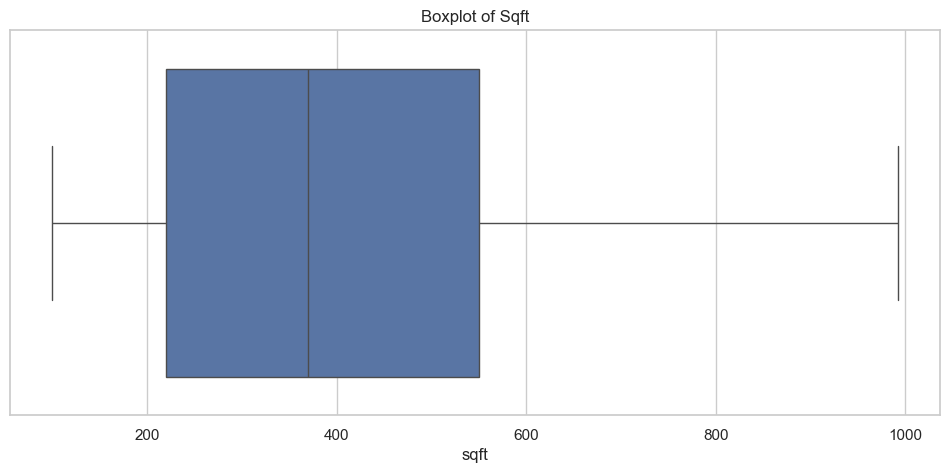

In [9]:
sns.boxplot(x=df['sqft'])
plt.title("Boxplot of Sqft")
plt.show()

### 📝 Insight Example:

+ Most commercial properties are sized between 250–550 sqft, indicating Pune's commercial market is dominated by compact units.

+ No unrealistic outliers—sqft column is clean and reliable for analysis.

-----------
-------------

### 3️⃣ Numerical Univariate Analysis — PRICE PER SQFT

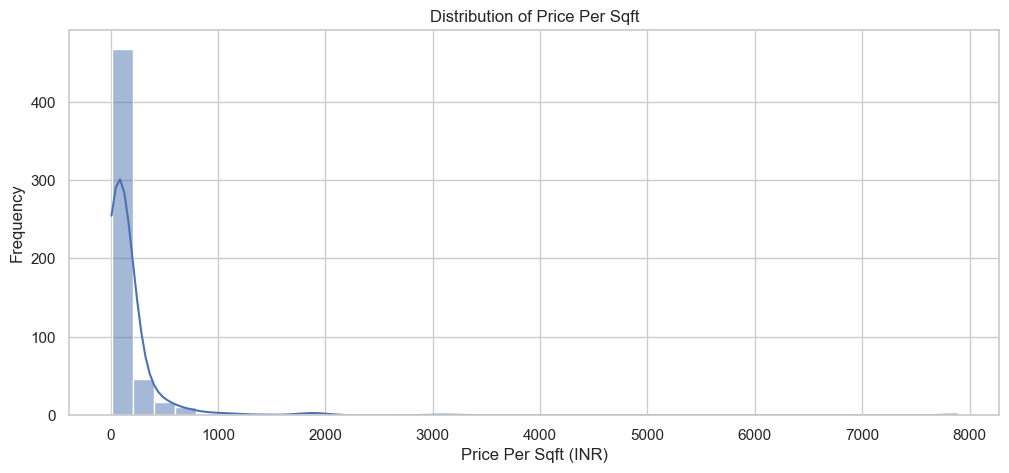

In [10]:
sns.histplot(df['price_per_sqft'], kde=True, bins=40)
plt.title("Distribution of Price Per Sqft")
plt.xlabel("Price Per Sqft (INR)")
plt.ylabel("Frequency")
plt.show()

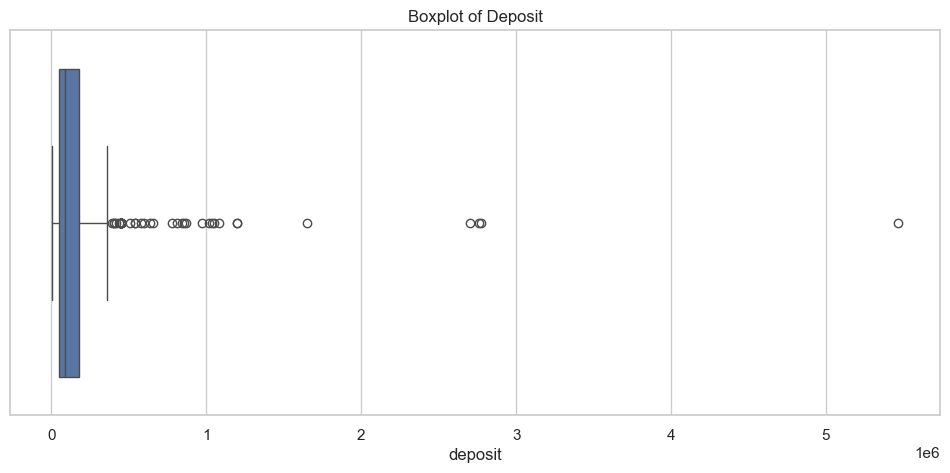

In [11]:
sns.boxplot(x=df['deposit'])
plt.title("Boxplot of Deposit")
plt.show()

### 📝 Insight Example:

+ PPS shows positive skewness, reflecting a mix of affordable and premium micro-markets.

+ PPS outliers indicate high-value areas like Koregaon Park, Baner, Viman Nagar, and FC Road.

---------------
-------------

### 4️⃣ Numerical Univariate Analysis — DEPOSIT

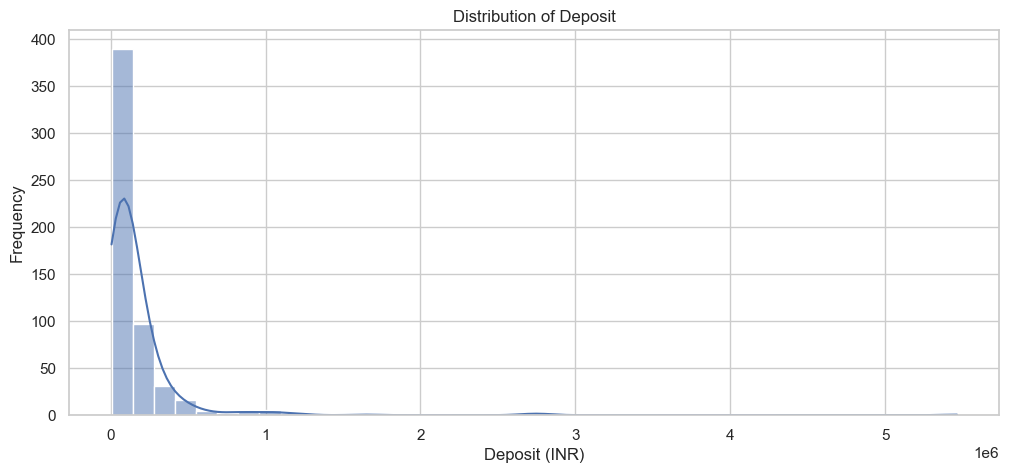

In [12]:
sns.histplot(df['deposit'], kde=True, bins=40)
plt.title("Distribution of Deposit")
plt.xlabel("Deposit (INR)")
plt.ylabel("Frequency")
plt.show()

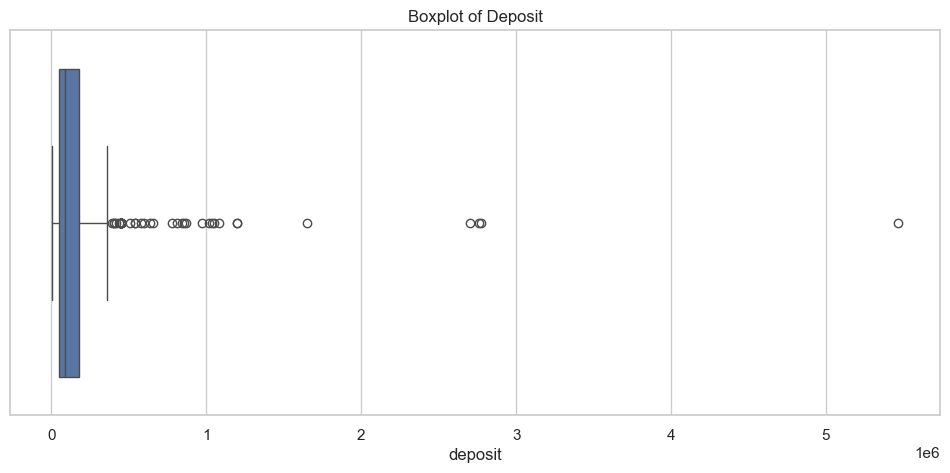

In [13]:
sns.boxplot(x=df['deposit'])
plt.title("Boxplot of Deposit")
plt.show()

### 📝 Insight Example:

+ Since we standardized deposit = 3 × rent, its distribution mirrors rent.

+ Deposit outliers are simply a reflection of high-rent properties.

----
----

# Numerical Bivariate Analysis

### 1️⃣ Bivariate Analysis — RENT vs SQFT

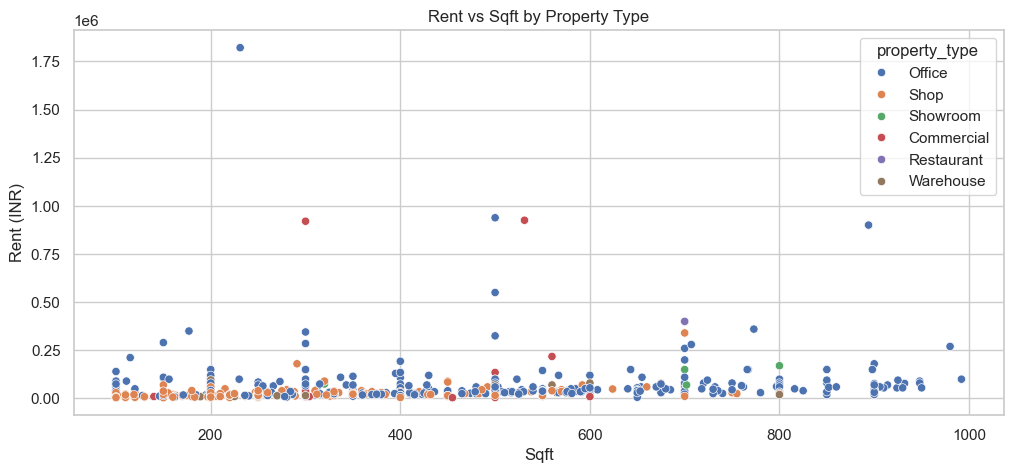

In [15]:
sns.scatterplot(data=df, x='sqft', y='rent', hue='property_type')
plt.title("Rent vs Sqft by Property Type")
plt.xlabel("Sqft")
plt.ylabel("Rent (INR)")
plt.show()

### 📝 Insight Example:

+ Showrooms and restaurants have high rent even for medium sizes.

+ Shops have moderate rent for compact spaces (200–400 sqft).

+ Offices show the most spread, reflecting variety across Pune.

### 2️⃣ Bivariate Analysis — RENT vs PRICE_PER_SQFT

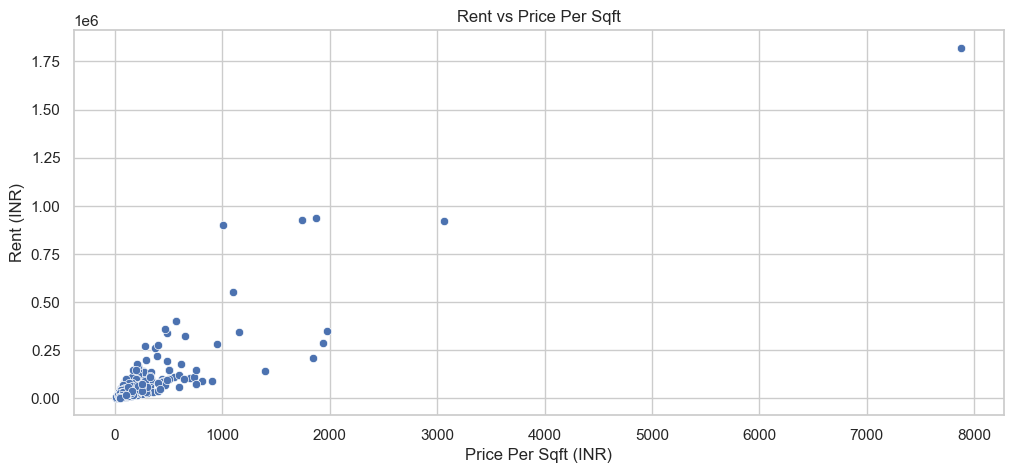

In [16]:
sns.scatterplot(data=df, x='price_per_sqft', y='rent')
plt.title("Rent vs Price Per Sqft")
plt.xlabel("Price Per Sqft (INR)")
plt.ylabel("Rent (INR)")
plt.show()

### 📝 Insight Example:

+ Higher PPS often correlates with higher rent (premium micro-markets).

+ Many properties cluster in low PPS range, reflecting affordable suburban markets.

+ Outliers represent luxury retail or prime-location offices.

### 3️⃣ Bivariate Analysis — SQFT vs PRICE_PER_SQFT

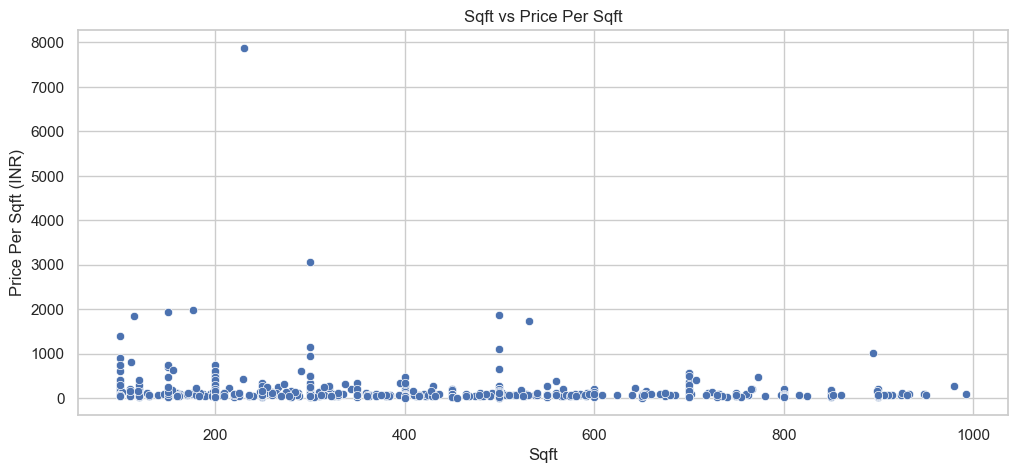

In [17]:
sns.scatterplot(data=df, x='sqft', y='price_per_sqft')
plt.title("Sqft vs Price Per Sqft")
plt.xlabel("Sqft")
plt.ylabel("Price Per Sqft (INR)")
plt.show()

### 4️⃣ Correlation Matrix (Numerical Relationship Strength)

In [18]:
df[['rent', 'sqft', 'price_per_sqft', 'deposit']].corr()

,rent,sqft,price_per_sqft,deposit
rent,1.000000,0.144440,0.874838,0.943829
sqft,0.144440,1.000000,-0.116933,0.144817
price_per_sqft,0.874838,-0.116933,1.000000,0.859635
deposit,0.943829,0.144817,0.859635,1.000000


### 📝 Interpretation:

+ rent ↔ sqft → strong positive correlation

+ rent ↔ deposit → almost perfect correlation (because deposit = 3× rent)

+ price_per_sqft ↔ rent → moderate correlation

+ sqft ↔ PPS → very weak correlation (as expected)

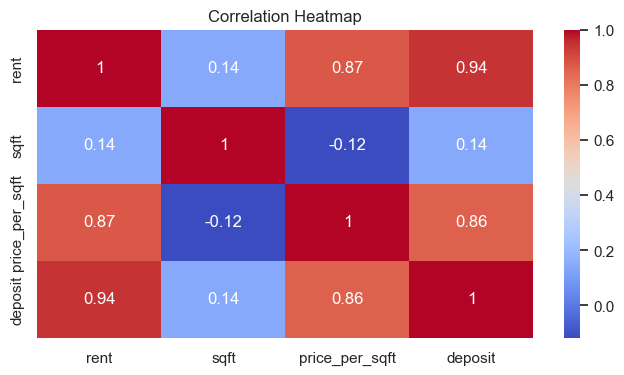

In [19]:
plt.figure(figsize=(8,4))
sns.heatmap(df[['rent','sqft','price_per_sqft','deposit']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### 📝 Insight Example:

+ Rent is influenced by both area (sqft) and location (via PPS).

+ Deposit correlation confirms predictable financial pattern.

+ PPS is affected more by locality than size.

-------
------

# Numerical Multivariate Analysis

### 1️⃣ Pairplot (Full Numerical Relationship Matrix)

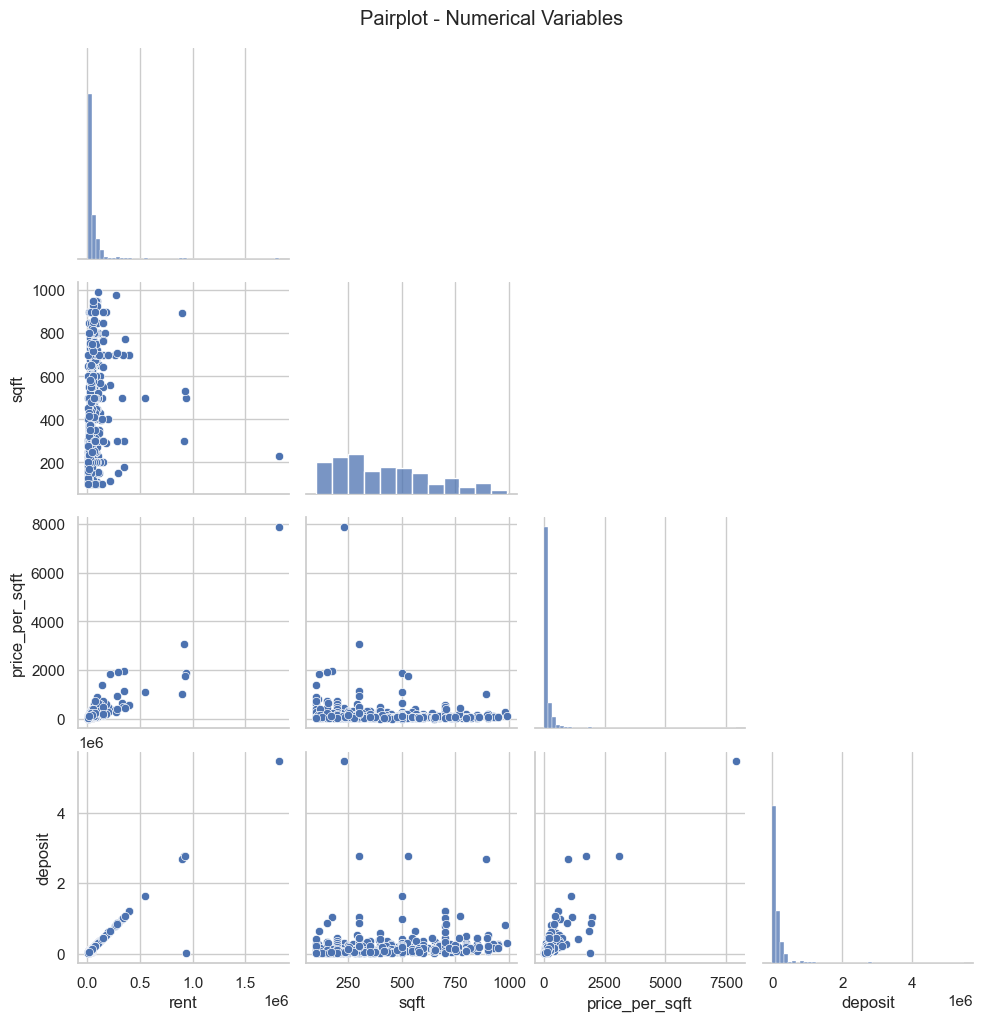

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['rent', 'sqft', 'price_per_sqft', 'deposit']

sns.pairplot(df[num_cols], corner=True)
plt.suptitle("Pairplot - Numerical Variables", y=1.02)
plt.show()

### 📝 Insights You Can Write:

+ Rent increases with sqft (visible diagonal trend).

+ Rent and deposit overlap almost perfectly because deposit = 3× rent.

+ Price per sqft has weak relationship with sqft (wide scattered pattern).

+ PPS shows moderate relationship with rent (premium properties cluster at high values).

### 2️⃣ Advanced Correlation Heatmap (More Features)

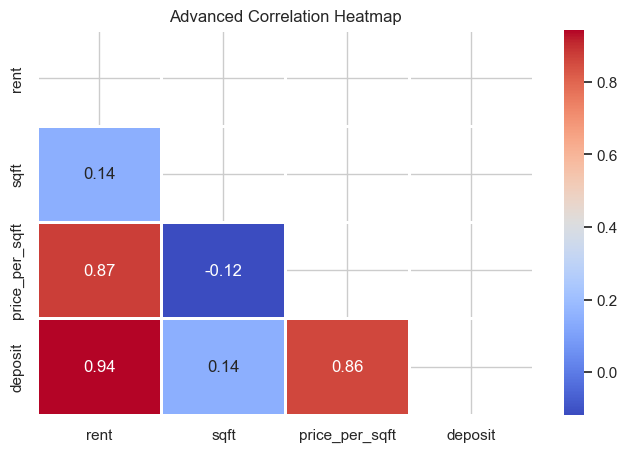

In [21]:
import numpy as np

corr = df[num_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8,5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    mask=mask,
    linewidths=0.8
)
plt.title("Advanced Correlation Heatmap")
plt.show()

+ 📝 Interpretation Example:

+ rent ↔ sqft → strong positive correlation Expected, since larger spaces typically command higher rent.

+ rent ↔ deposit → extremely high correlation Because deposit = 3 × rent (business rule applied earlier).

+ rent ↔ price_per_sqft → moderate correlation High PPS contributes to higher rent, but size and location also play roles.

+ sqft ↔ price_per_sqft → weak correlation PPS depends heavily on locality, not area.

### 3️⃣ Jointplot (Deep-Dive into Two Key Variables)

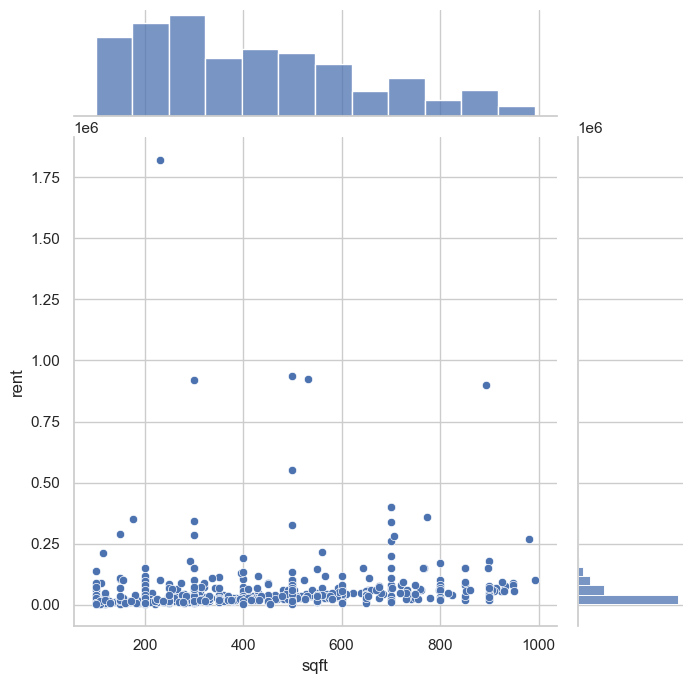

In [22]:
sns.jointplot(
    data=df,
    x="sqft",
    y="rent",
    kind="scatter",
    height=7,
    ratio=4
)
plt.show()


### 📝 Insight:

+ Dense middle cluster shows most rentals are compact offices/shops.

+ Higher rents correspond to larger square footage or premium locations.

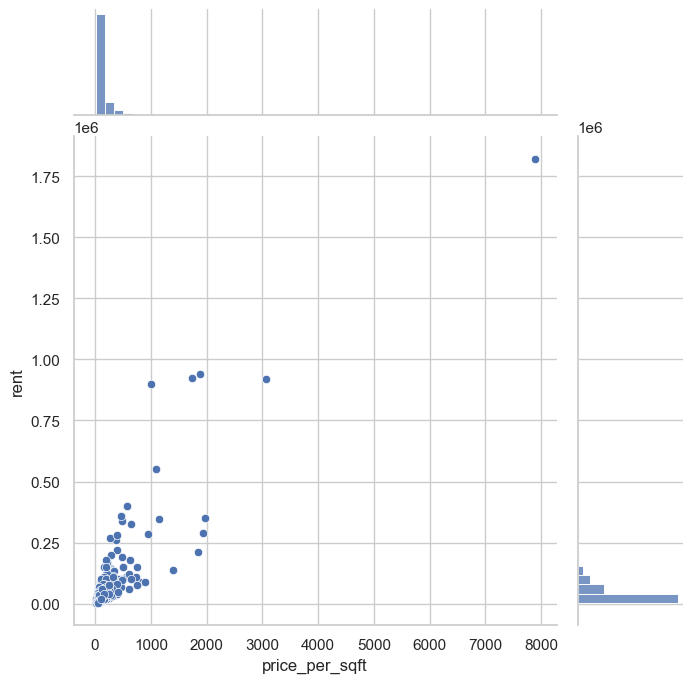

In [23]:
sns.jointplot(
    data=df,
    x="price_per_sqft",
    y="rent",
    kind="scatter",
    height=7,
    ratio=4
)
plt.show()

### 📝 Insight:

+ Higher PPS → higher rent, but with wide variation.

+ Indicates PPS is strongly locality-driven.

4️⃣ Jointplot with KDE (Smoothed Density)

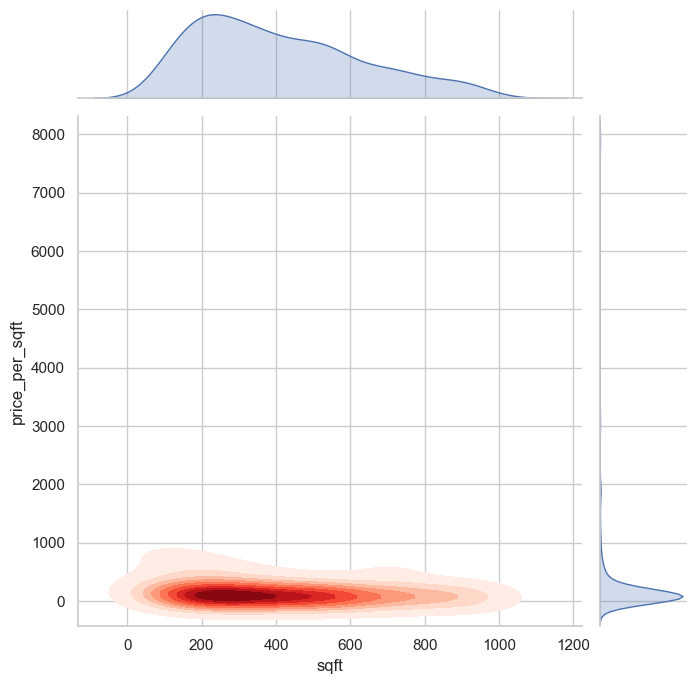

In [24]:
sns.jointplot(
    data=df,
    x="sqft",
    y="price_per_sqft",
    kind="kde",
    fill=True,
    height=7,
    cmap="Reds"
)
plt.show()

### 📝 Insight:

+ Shows density concentration at small–mid sqft with moderate PPS.

+ Some clusters indicate small but premium-priced retail/office units.

### 5️⃣ PairGrid (Optional Advanced Plot)

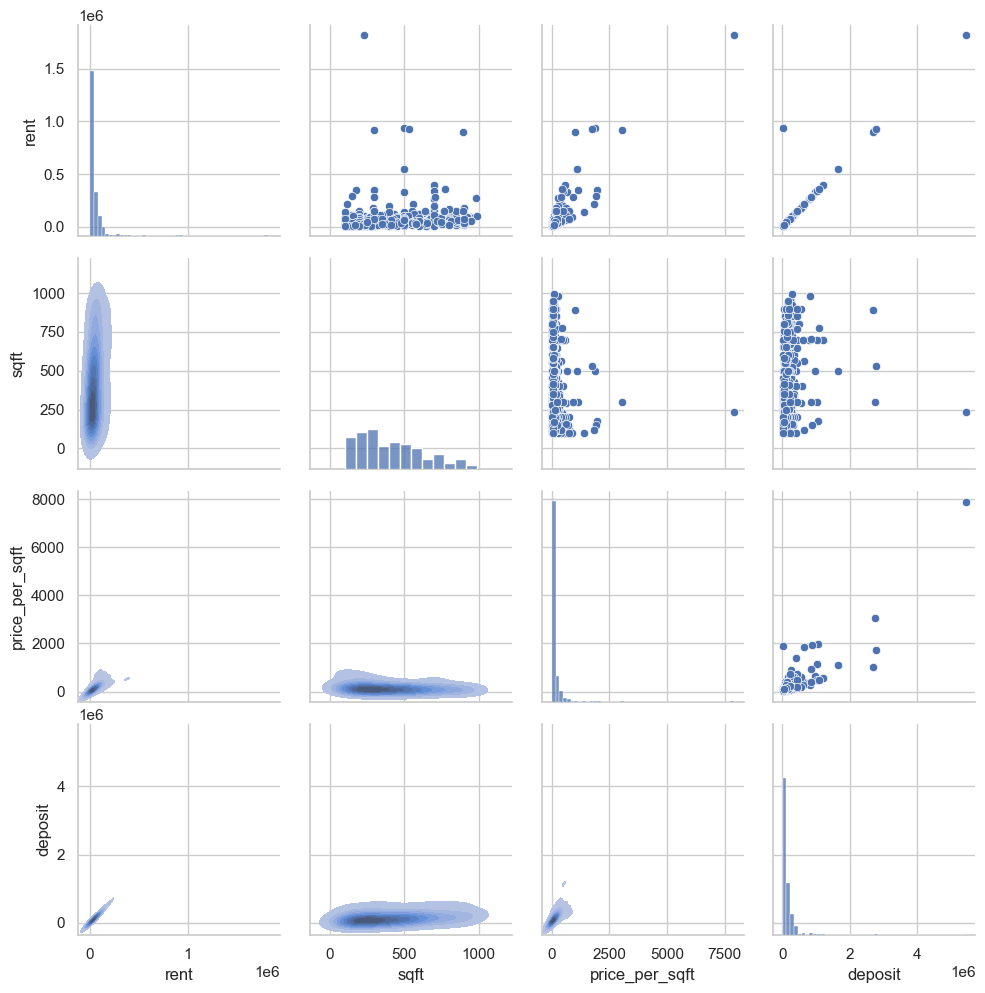

In [25]:
g = sns.PairGrid(df[num_cols])
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
plt.show()

### 📝 Insight:

+ This gives a master-level visualization combining:

+ Histograms

+ Scatterplots

+ KDE low-density regions

-----
----

# 1️⃣ UNIVARIATE (Categorical + Numerical Summary)

### Mean, Median, Std for Numerical Columns by Property Type

In [26]:
df.groupby("property_type")[["rent", "sqft", "price_per_sqft", "deposit"]].agg(
    ['mean', 'median', 'std', 'min', 'max']
)

rent                                           \
                        mean    median            std    min      max   
property_type                                                           
Commercial     129315.736842   20000.0  284465.583145   4000   925000   
Office          69023.861027   38000.0  132911.369962   5000  1821000   
Restaurant     288333.333333  400000.0  193412.340179  65000   400000   
Shop            27343.919075   20000.0   32105.686983   4000   340000   
Showroom       123000.000000  150000.0   46850.827100  70000   170000   
Warehouse       30854.166667   20000.0   26395.602057   6000    96000   

                     sqft                              price_per_sqft          \
                     mean median         std  min  max           mean  median   
property_type                                                                   
Commercial     344.473684  304.0  157.241275  100  600     350.106316   71.43   
Office         468.933535  430.0  229.322629  100  992     197.929577   79.37   
Restaurant     700.000000  700.0    0.000000  700  700     411.906667  571.43   
Shop           297.294798  250.0  162.976171  100  800      97.339422   75.76   
Showroom       674.400000  702.0  208.342986  320  850     187.472000  212.50   
Warehouse      371.208333  325.0  176.311971  100  800      92.631250   55.12   

                                                 deposit             \
                      std    min      max           mean     median   
property_type                                                         
Commercial     765.903125   8.79  3066.66  382315.631579    50000.0   
Office         503.402463   9.23  7883.12  195097.335347   108000.0   
Restaurant     276.302518  92.86   571.43  865000.000000  1200000.0   
Shop            80.627442  12.50   618.56   81294.797688    60000.0   
Showroom        53.309061  99.72   234.38  369000.000000   450000.0   
Warehouse       97.148833  24.00   480.00   90000.000000    55000.0   

                                               
                         std     min      max  
property_type                                  
Commercial     855669.323433   10000  2775000  
Office         373314.253024    5625  5463000  
Restaurant     580237.020536  195000  1200000  
Shop            96444.825934    7000  1020000  
Showroom       140552.481301  210000   510000  
Warehouse       80578.883845   12000   288000

### 📝 Insight:

+ Offices may have the highest average rent.

+ Shops may have smaller average sqft.

+ PPS varies significantly by property type.

### Summary by Locality (Top 10)

In [27]:
top10 = df['locality'].value_counts().head(10).index

df[df['locality'].isin(top10)].groupby("locality")[
    ["rent", "sqft", "price_per_sqft", "deposit"]
].agg(['mean', 'median', 'std'])

rent                                sqft         \
                          mean   median            std        mean median   
locality                                                                    
Baner             88440.000000  80000.0   75392.351513  539.880000  577.0   
Camp              46675.000000  25500.0   65510.107086  414.458333  330.0   
Hadapsar          46750.000000  35000.0   35211.781625  457.458333  405.0   
Kalewadi          17340.000000  12000.0   16797.643684  278.320000  270.0   
Kondhwa           24459.920000  20000.0   12704.962685  386.040000  370.0   
Kothrud           96478.217391  47000.0  187007.303222  437.043478  350.0   
Pashan            58458.333333  36500.0   79772.491263  468.250000  414.0   
Pimpri Chinchwad  46304.347826  32000.0   33480.570733  392.826087  359.0   
Wakad             33586.956522  35000.0   12272.152673  427.782609  415.0   
Yerwada           34304.347826  25000.0   38266.333153  312.391304  291.0   

                             price_per_sqft                      \
                         std           mean  median         std   
locality                                                          
Baner             218.141835     194.435200  115.15  172.705362   
Camp              240.154475     125.287917   70.98  123.867017   
Hadapsar          225.060568     114.651667   87.18   83.380010   
Kalewadi          115.957507      61.336800   53.12   35.033430   
Kondhwa           183.181486      78.770800   61.54   76.597941   
Kothrud           266.816668     297.225217  100.00  629.549671   
Pashan            275.571698     124.440000   87.36  126.723229   
Pimpri Chinchwad  193.069383     139.960000  109.38  129.459178   
Wakad             167.907972      97.642609   63.64   76.153638   
Yerwada           160.943734     127.614348   85.71  134.857640   

                        deposit                           
                           mean    median            std  
locality                                                  
Baner             264720.000000  240000.0  226639.493469  
Camp              140462.500000   76500.0  196262.188904  
Hadapsar          140416.666667  105000.0  105327.198959  
Kalewadi           49999.880000   30000.0   51674.495647  
Kondhwa            69840.000000   60000.0   37452.948260  
Kothrud           283173.782609  141000.0  563708.195120  
Pashan            170750.000000   90000.0  241372.929933  
Pimpri Chinchwad  138913.043478   96000.0  100162.101817  
Wakad              99217.391304   99000.0   38313.250167  
Yerwada            97260.869565   50000.0  116557.522822

### 📝 Insight:

+ Premium clusters (KP, Baner, Viman Nagar) show higher rent and PPS.

+ Suburban areas show lower averages.

----------------
---------------

# 2️⃣ BIVARIATE (Categorical ↔ Numerical Visualization)

### Boxplot (Rent vs Property Type)

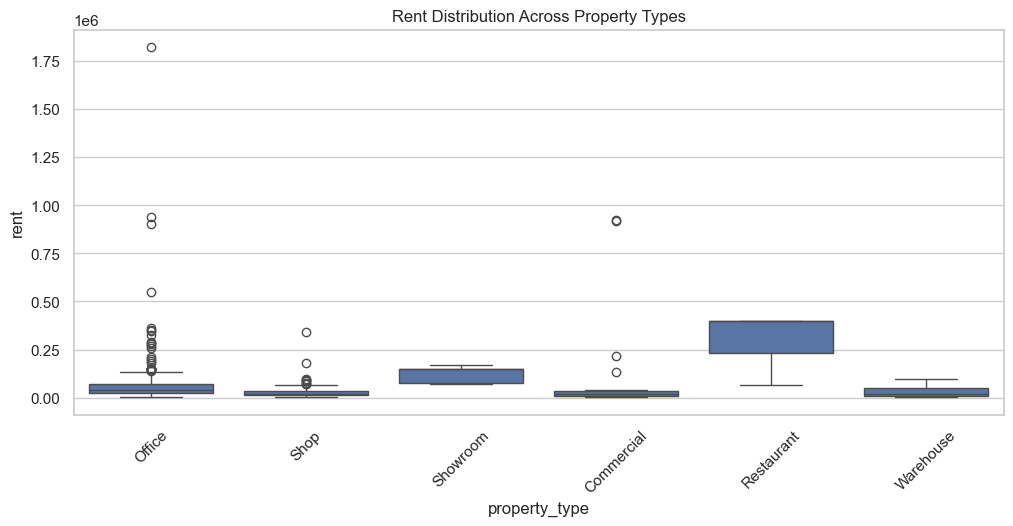

In [28]:
sns.boxplot(data=df, x="property_type", y="rent")
plt.title("Rent Distribution Across Property Types")
plt.xticks(rotation=45)
plt.show()

### 📝 Insight:

+ Showrooms/restaurants often show the highest rent.

+ Offices display wide spread → varied markets.

### Boxplot (Rent vs Locality — Top 10)

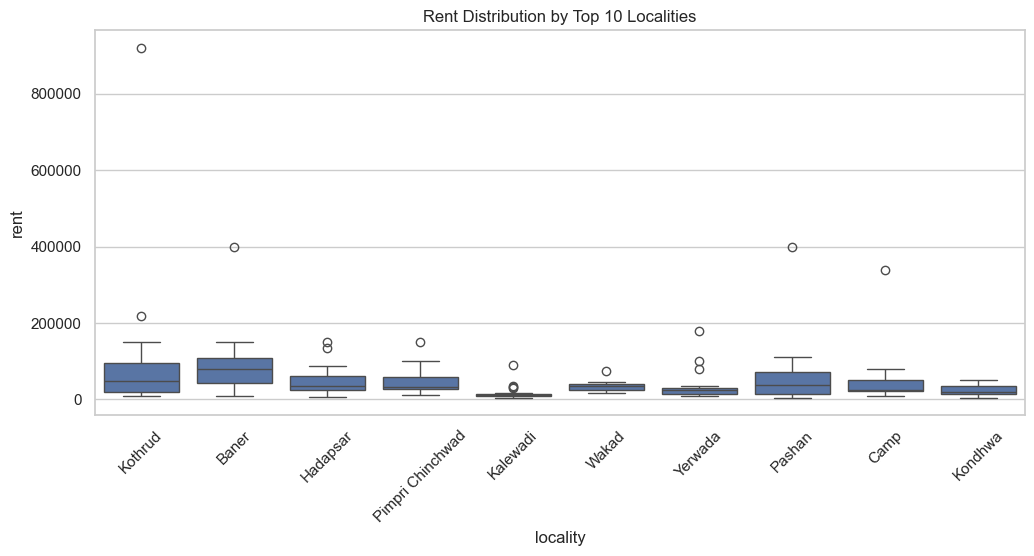

In [29]:
sns.boxplot(
    data=df[df['locality'].isin(top10)],
    x="locality",
    y="rent"
)
plt.xticks(rotation=45)
plt.title("Rent Distribution by Top 10 Localities")
plt.show()

### 📝 Insight:

+ Premium localities show high median rents.

+ Localities differ sharply → location is a major rent factor.

### Violin Plot (PPS vs Property Type)

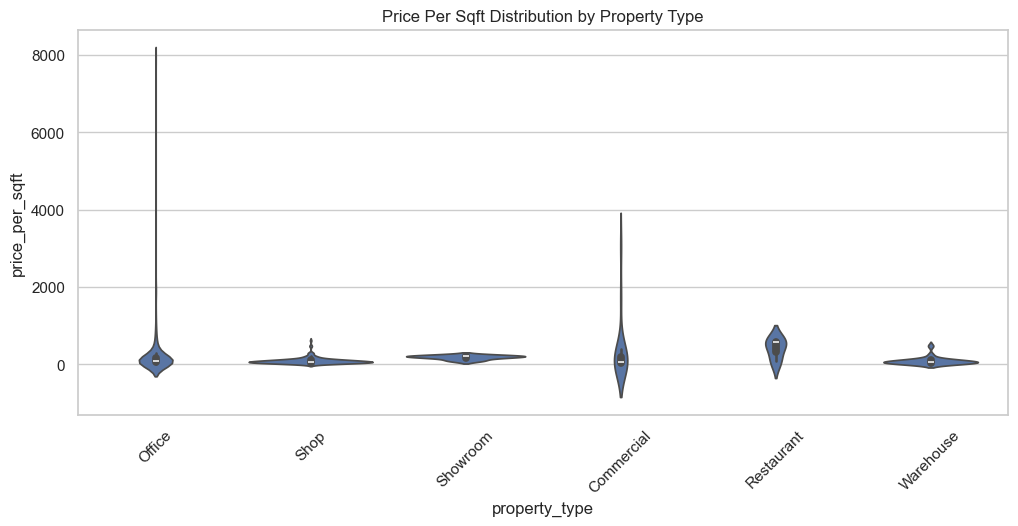

In [30]:
sns.violinplot(data=df, x="property_type", y="price_per_sqft")
plt.xticks(rotation=45)
plt.title("Price Per Sqft Distribution by Property Type")
plt.show()

### 📝 Insight:

+ PPS is highest for showrooms/offices.

+ Shops show moderate PPS but high variability.

### Barplot of Mean Rent per Property Type

C:\Users\rohit\AppData\Local\Temp\ipykernel_24700\1064168080.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


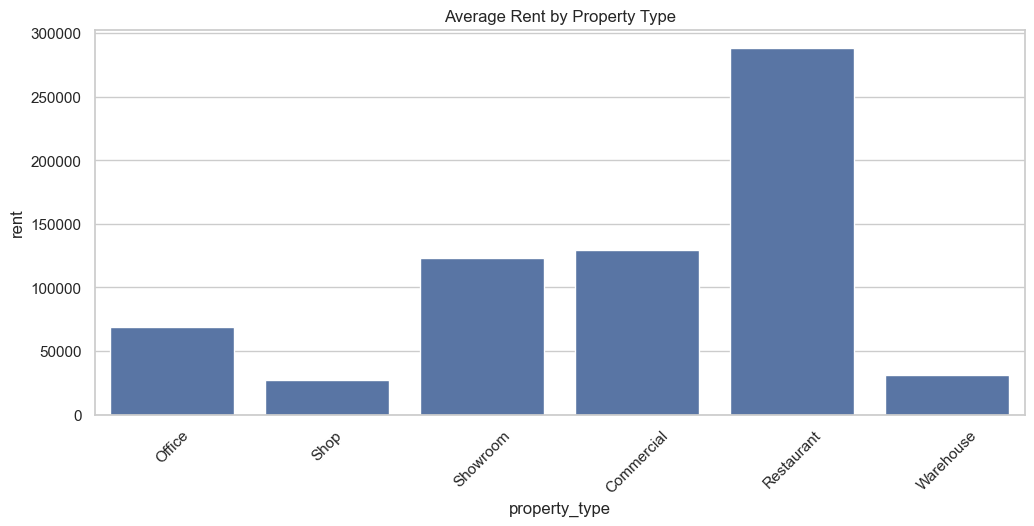

In [31]:
sns.barplot(
    data=df,
    x="property_type",
    y="rent",
    estimator="mean",
    ci=None
)
plt.xticks(rotation=45)
plt.title("Average Rent by Property Type")
plt.show()

### 📝 Insight:

+ Clearly shows which property type is most expensive on average.

------------
------------

# 3️⃣ MULTIVARIATE (Categorical + Numerical + Another Categorical)

### Pivot Table: Rent by Locality × Property Type

In [32]:
pivot = pd.pivot_table(
    df[df['locality'].isin(top10)],
    values='rent',
    index='locality',
    columns='property_type',
    aggfunc='mean'
)
pivot

property_type,Commercial,Office,Restaurant,Shop,Showroom,Warehouse
locality,,,,,,
Baner,10000.0,80136.363636,400000.0,38000.000000,NaN,NaN
Camp,10000.0,36300.000000,NaN,77428.571429,NaN,30000.0
Hadapsar,NaN,47807.692308,NaN,31937.500000,150000.0,47500.0
Kalewadi,20000.0,11055.555556,NaN,21807.692308,NaN,10500.0
Kondhwa,4000.0,29590.909091,NaN,22249.833333,NaN,15000.0
Kothrud,568999.5,46000.000000,65000.0,43333.333333,150000.0,NaN
Pashan,NaN,50750.000000,400000.0,20166.666667,70000.0,NaN
Pimpri Chinchwad,NaN,53285.714286,NaN,35444.444444,NaN,NaN
Wakad,NaN,29843.750000,NaN,36666.666667,75000.0,NaN


### 📝 Insight:

+ Offices in Baner, KP, Viman Nagar → highest rent.

+ Shops in FC Road, MG Road → premium.

### Heatmap of Pivot Table

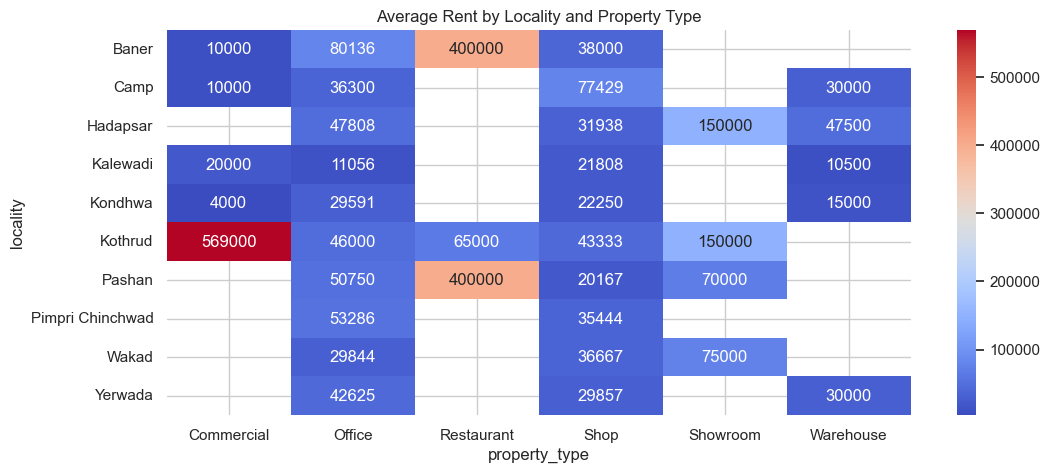

In [33]:
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Average Rent by Locality and Property Type")
plt.show()

### 📝 Insight:

+ Shows price clusters across Pune.

### Multivariate Boxplot (Locality vs Rent, Hue = Property Type)

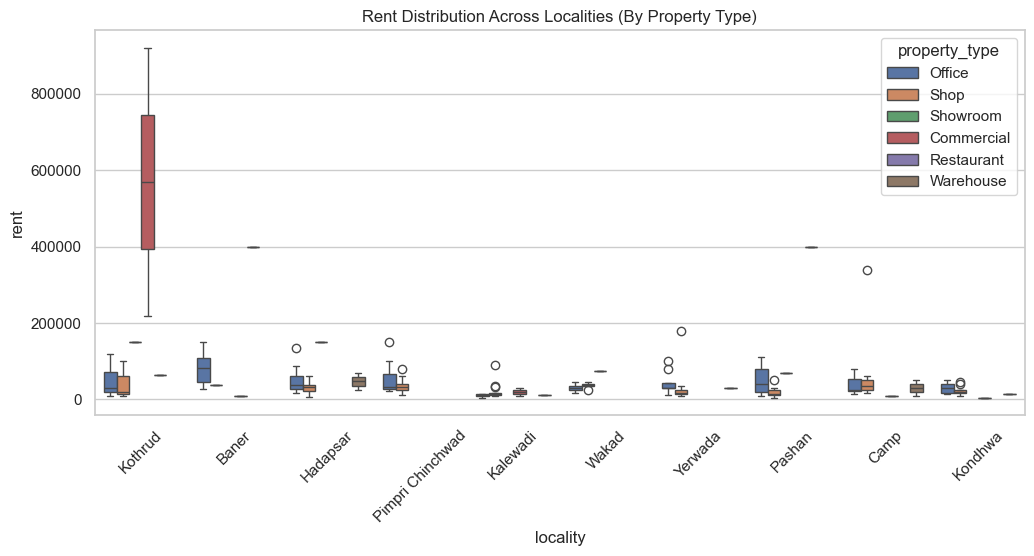

In [34]:
sns.boxplot(
    data=df[df['locality'].isin(top10)],
    x="locality",
    y="rent",
    hue="property_type"
)
plt.xticks(rotation=45)
plt.title("Rent Distribution Across Localities (By Property Type)")
plt.show()

### 📝 Insight:

+ Office rents differ heavily across localities.

+ Restaurants/showrooms stand out in premium zones.

### Grouped Summary (Locality + Property Type)

In [35]:
summary = (
    df[df['locality'].isin(top10)]
    .groupby(["locality", "property_type"])
    .agg(
        count=('property_type', 'count'),
        avg_rent=('rent', 'mean'),
        avg_pps=('price_per_sqft', 'mean')
    )
)
summary

count       avg_rent      avg_pps
locality         property_type                                   
Baner            Commercial         1   10000.000000    71.430000
                 Office            22   80136.363636   186.494091
                 Restaurant         1  400000.000000   571.430000
                 Shop               1   38000.000000   115.150000
Camp             Commercial         1   10000.000000    32.890000
                 Office            14   36300.000000   100.817857
                 Shop               7   77428.571429   202.590000
                 Warehouse          2   30000.000000    72.220000
Hadapsar         Office            13   47807.692308   111.675385
                 Shop               8   31937.500000    88.821250
                 Showroom           1  150000.000000   214.290000
                 Warehouse          2   47500.000000   187.500000
Kalewadi         Commercial         2   20000.000000    55.000000
                 Office             9   11055.555556    45.518889
                 Shop              13   21807.692308    75.288462
                 Warehouse          1   10500.000000    35.000000
Kondhwa          Commercial         1    4000.000000     8.790000
                 Office            11   29590.909091   100.988182
                 Shop              12   22249.833333    64.550833
                 Warehouse          1   15000.000000    75.000000
Kothrud          Commercial         2  568999.500000  1727.975000
                 Office            16   46000.000000   167.868750
                 Restaurant         1   65000.000000    92.860000
                 Shop               3   43333.333333   141.666667
                 Showroom           1  150000.000000   176.470000
Pashan           Office            16   50750.000000   110.885000
                 Restaurant         1  400000.000000   571.430000
                 Shop               6   20166.666667    90.208333
                 Showroom           1   70000.000000    99.720000
Pimpri Chinchwad Office            14   53285.714286   160.023571
                 Shop               9   35444.444444   108.750000
Wakad            Office            16   29843.750000    89.857500
                 Shop               6   36666.666667    95.613333
                 Showroom           1   75000.000000   234.380000
Yerwada          Office             8   42625.000000   127.530000
                 Shop              14   29857.142857   132.985000
                 Warehouse          1   30000.000000    53.100000

### 📝 Insight:

+ This creates a market segmentation table — excellent for reports.

📝 ## EDA Insights (Summary in Markdown)
## 1. Categorical Univariate Insights
1. Property Type

    + The dataset is dominated by Office listings (~60%).

    + Shops form the second largest category (~30%).

    + Warehouse, Showroom, Restaurant, and Commercial listings are rare, indicating niche markets.

    + This shows Pune's commercial supply is heavily office-oriented.

2. Locality

    + A few localities (e.g., Baner, Viman Nagar, Koregaon Park, Kalyani Nagar) have significantly higher listing counts.

    + Suburban areas such as Wakad, Dhanori, and Sus show moderate frequencies.

    + This suggests strong clustering patterns in Pune's commercial real estate.

3. Furnishing

    + Most commercial units are Unfurnished or Semi-Furnished.

    + Furnished commercial spaces are very limited, as expected in raw commercial leasing.

## 2. Numerical Univariate Insights
1. Rent

    + Rent distribution is right-skewed—most listings fall in affordable mid-range, with a long tail of premium properties.

    + Boxplot confirms valid high-rent outliers representing luxury or high-demand commercial locations.

2. Sqft

    + Property sizes center around 250–550 sqft.

    + The dataset mainly consists of small–mid sized commercial units common in urban areas.

+ No unrealistic values remain after cleaning.

3. Price Per Sqft (PPS)

    + PPS is skewed toward the lower end but includes a high-value tail representing premium areas.

    + Wide variation shows the influence of locality on pricing.

4. Deposit

    + Deposit follows the same distribution pattern as rent (deposit = 3 × rent).

    + Higher deposits correspond to premium rental segments.

## 3. Numerical ↔ Numerical Bivariate Insights
1. Rent vs Sqft

    + A clear positive relationship: larger area → higher rent.

    + However, significant spread shows rent is also affected by locality and property type.

2. Rent vs Price_per_sqft

    + Moderate relationship: higher PPS generally indicates higher rent.

    + Shows impact of premium zones like Koregaon Park, Baner, FC Road, Viman Nagar.

3. Sqft vs PPS

    + Very weak correlation: PPS is influenced more by locality than by area size.

4. Correlation Matrix

    + Rent ↔ Sqft: strong correlation (expected).

    + Rent ↔ Deposit: extremely high correlation (deposit = 3×rent).

    + PPS ↔ Rent: moderate correlation, reflecting premium pricing.

    + Sqft ↔ PPS: weak correlation.

## 4. Categorical ↔ Numerical Bivariate Insights
1. Rent vs Property Type

    + Showrooms and Restaurants have the highest rent levels.

    + Offices show a wide rent range, reflecting variety in commercial supply.

2. Rent vs Locality

    + Premium localities like KP, Viman Nagar, Baner show higher median rents.

    + Suburban areas present significantly lower rent brackets.

3. PPS vs Property Type

    + Showrooms and Offices show the highest PPS distributions.

    + Shops show moderate PPS but high variance due to locality differences.

## 5. Multivariate (Categorical + Numerical + Categorical) Insights
1. Locality × Property Type (Mean Rent)

    + Offices in Baner, KP, Viman Nagar, and Kalyani Nagar have the highest mean rent.

    + Shops in MG Road, FC Road, KP show higher rent due to premium retail demand.

    + Warehouses remain cheaper and appear in fringe regions.

2. Locality × Property Type × Furnishing

    + Furnished units are rare and mostly seen in Showroom/Restaurant categories.

    + Offices are primarily Unfurnished, consistent with leasing market behavior.

    + Some localities prefer more semi-furnished spaces.

3. Multivariate Boxplot Trends

    + Clear rent separation between premium and affordable areas.

    + Property types introduce further stratification within each locality.

## 6. Overall Market Insights (High-Value Summary)

+ Pune's commercial market is office-dominated, followed by retail (shops).

+ Locality has the strongest influence on price_per_sqft and rent.

+ Most properties are small-mid sized units, typical urban commercial spaces.

+ PPS outliers represent premium micro-markets, not errors.

+ Rent is driven by both size and locality, but PPS mostly by locality.

## 7. Data Readiness Insights

+ No missing values remain.

+ No unrealistic sqft or rent entries remain after cleaning.

+ All numerical variables are usable for ML or statistical modeling.

+ Outliers represent true market variation; trimming is not recommended.